### House Price Prediction Problem

The training dataset contains the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc.
Goal is to predict the house price on test data.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read the csv file
data = pd.read_csv('wk3_kc_house_train_data.csv')

# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [3]:
# setting the option to display all the columns
pd.set_option('display.max_columns', None)

In [4]:
# sample of the data
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [5]:
# checking for nulls in the data

data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Null values are observed in data.

In [6]:
# overview of the data variables

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


Median of Price is less than its mean indicating a right skewed distribution of price.  
Bedrooms of maximum '33' seems unusual, to be checked further.  
Waterfront, View variables have 75% or more values as zero.  
Sqft_basement has 50% or more values as zero.

### 1. Hypothesis and EDA

Initial hypothesis:

* no. of bedrooms and bathrooms - will have an impact and proportional to the price.
* sqft_living,lot - will have an big impact and proportional to the price.
* floor - will have an impact and proportional to the price.
* waterfront - some people may prefer homes with this, but won't have much impact.
* view - many prefer this in luxurious homes, may have an impact on price. 
* condition - this is impotant for selling house, so will affect the price. 
* grade - will have good impact on the price. 
* sqft_above - this will be directly proportional to the price. 
* sqft_basement - this will be directly proportional to the price. 
* yr_built - This will have an impact on price. 
* zipcode, lat, lon - these denote location, so will have an impact on the price. 
* sqft_living_15, lot_15 - might have some impact as it denotes neighbourhood details and it determines a land's price
* view, waterfront may have impact on high valued properties.

### EDA

### Target variable - price

<AxesSubplot:xlabel='price', ylabel='Count'>

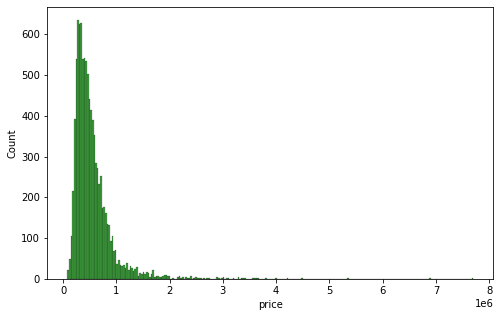

In [9]:
# histogram

fig,ax = plt.subplots(figsize=(8,5))
sns.histplot(data = data, x= 'price', color ='g')

<AxesSubplot:ylabel='price'>

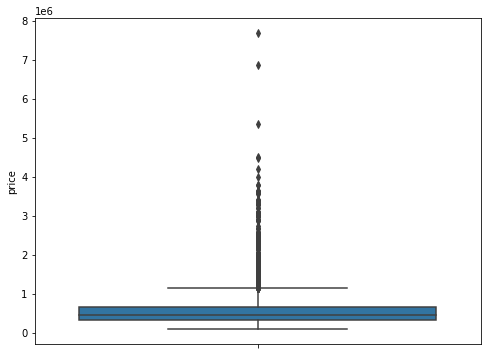

In [10]:
# boxplot

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data = data, y = data['price'])

price appears to have Right skewed distribution.

### Bedrooms

In [11]:
# number of bedrooms
print("Bedrooms:")
print("Mean: ",data["bedrooms"].mean())
print("Nulls: ",data["bedrooms"].isnull().sum())
print("Median: ",data["bedrooms"].median())
print("Zeroes: ",(data["bedrooms"]==0).sum())
print("Min: ",(data["bedrooms"]).min())
print("Max: ",(data["bedrooms"]).max())

pd.crosstab(data.bedrooms, columns="Counts").T

# some zeroes, some outliers


Bedrooms:
Mean:  3.375883618481713
Nulls:  0
Median:  3.0
Zeroes:  6
Min:  0
Max:  33


bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
col_0,,,,,,,,,,,,,
Counts,6,88,1255,4417,3094,755,116,17,7,3,1,1,1


In [12]:
data[((data.bedrooms > 7) | (data.bedrooms == 0))].sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8840,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
2228,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
4507,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8338,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4472,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1869,7226500100,20150219T000000,373000.0,8,3.00,2850,12714,1.0,0,0,3,7,2850,0,1959,0,98055,47.4859,-122.205,1480,4942
6840,7418000130,20141211T000000,430000.0,8,3.25,4300,10441,2.0,0,0,4,8,2800,1500,1979,0,98059,47.4786,-122.131,1780,10457
3909,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
4011,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
7204,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


one observation with bedrooms:33 seems wrong as the sqft_above is also only 1040.
Hence the observation can be deleted.

In [13]:
data[["bedrooms","price"]].groupby(["bedrooms"]).mean()
data[["bedrooms","price"]].groupby(["bedrooms"]).median().T

# does seem to increase till 6, not sure after that due to less data

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
price,250000.0,307500.0,375000.0,405000.0,550000.0,614285.0,652500.0,580000.0,808000.0,700000.0,650000.0,520000.0,640000.0


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

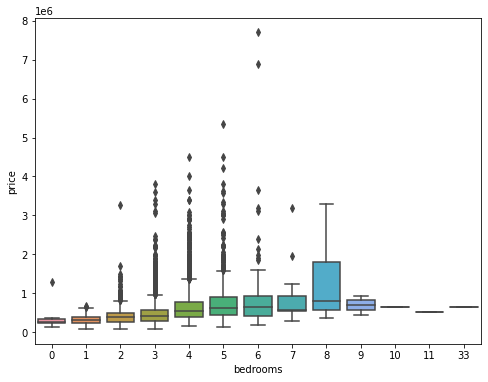

In [14]:
import seaborn as sns
# boxplot since discrete variable with less values
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = data['bedrooms'], y = data['price'])

Overall, it appears positively correlated to price.

### Bathrooms

In [15]:
# number of bathrooms, where .5 accounts for a room with a toilet but no shower
print("Bathrooms:")
print("Mean: ",data["bathrooms"].mean())
print("Nulls: ",data["bathrooms"].isnull().sum())
print("Median: ",data["bathrooms"].median())
print("Zeroes:", (data["bathrooms"]==0).sum())
print("Min: ",(data["bathrooms"]).min())
print("Max: ",(data["bathrooms"]).max())

pd.crosstab(data.bathrooms, columns="Counts").T

# some zeroes some outliers, what is 0.25?

Bathrooms:
Mean:  2.117175494314107
Nulls:  0
Median:  2.25
Zeroes: 4
Min:  0.0
Max:  8.0


bathrooms,0.00,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,7.50,7.75,8.00
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Counts,4,37,1741,5,599,1431,871,937,2409,525,335,274,339,72,61,33,47,9,10,5,6,3,2,1,2,1,1,1


In [16]:
data[["bathrooms","price"]].groupby(["bathrooms"]).median().T

# mostly positive correlation but can't say for sure beyond 6.25 due to less data

bathrooms,0.00,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,7.50,7.75,8.00
price,295000.0,276000.0,315000.0,397500.0,375000.0,423000.0,414050.0,467000.0,510000.0,591975.0,612000.0,810000.0,810000.0,1094000.0,1112500.0,1380000.0,1050000.0,1365000.0,1650000.0,1862000.0,2975000.0,1920000.0,3921500.0,3300000.0,1709445.0,450000.0,6885000.0,7700000.0


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

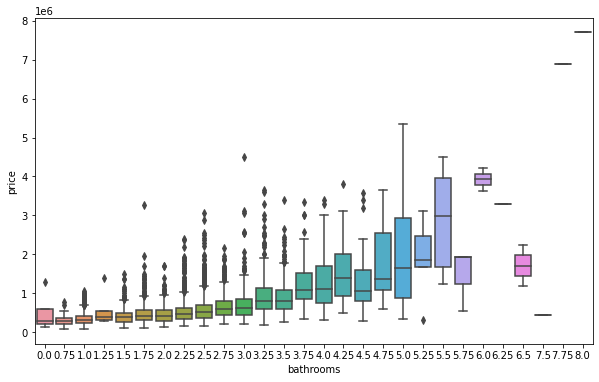

In [17]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = data['bathrooms'], y = data['price'])

Overall, it appears positively correlated to price except for few instances.

### Sqft_living

In [18]:
# square footage of the apartments interior living space
print("Sqft Living:")
print("Mean: ",data["sqft_living"].mean())
print("Nulls: ",data["sqft_living"].isnull().sum())
print("Median: ",data["sqft_living"].median())
print("Zeroes:", (data["sqft_living"]==0).sum())
print("Min: ",(data["sqft_living"]).min())
print("Max: ",(data["sqft_living"]).max())

# some outliers

Sqft Living:
Mean:  2086.734146091589
Nulls:  0
Median:  1910.0
Zeroes: 0
Min:  290
Max:  12050


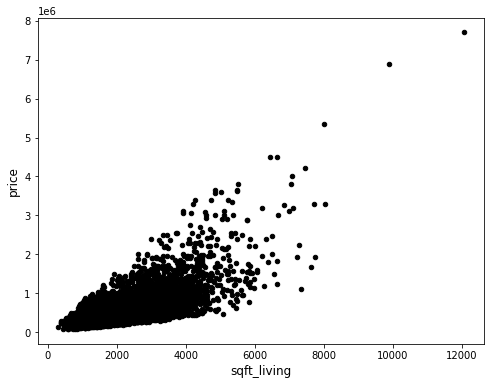

In [19]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='sqft_living', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('sqft_living', fontsize=12)
plt.show()

# show positive correlation

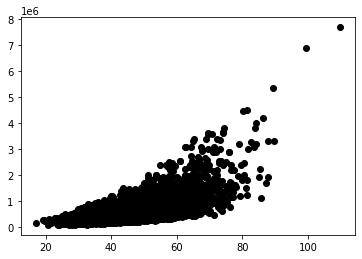

In [20]:
# Re-plot the scatter plot by taking the square root transformation of sqft living. Does the linearity 
# Improve  
import numpy as np

plt.scatter(np.sqrt(data.sqft_living), y=data.price, color='black')
plt.show()

It appears positively correlated wrt price.

**sqft_basement**

In [21]:
data.sqft_basement.describe()

count    9761.000000
mean      293.442987
std       442.612722
min         0.000000
25%         0.000000
50%         0.000000
75%       570.000000
max      3480.000000
Name: sqft_basement, dtype: float64

In [22]:
data_b = data.copy()
data_b['base'] = np.where(data_b.sqft_basement > 0, 1, 0)
data_b.base.value_counts()/len(data_b)

0    0.608647
1    0.391353
Name: base, dtype: float64

Almost 60% of the houses have basement value as 'zero' which indictes absence of basement.

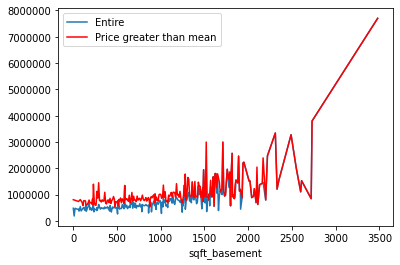

In [23]:
data.groupby('sqft_basement')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_basement')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')


plt.ticklabel_format(useOffset=False, style='plain')
plt.legend()

plt.show()

# with this plot we can see that by sqft_basement alone the price is not been affected


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

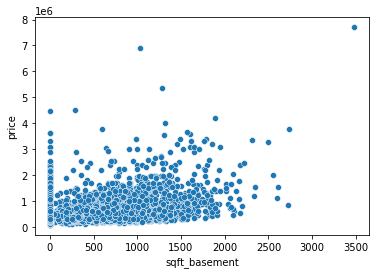

In [24]:
sns.scatterplot( x = data.sqft_basement, y = data.price)

# there isnt a strong corelation, but could see a general trend.

Appears a small positive correlation wrt price.

**sqft_above**

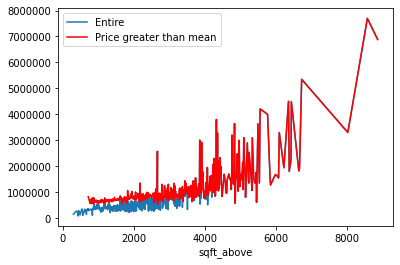

In [25]:
data.groupby('sqft_above')['price'].mean().plot(kind = 'line', label = 'Entire')

# here the data is subsetted by taking on columns that are greater than mean

data_subset = data[data.price > data.price.mean()]

data_subset.groupby('sqft_above')['price'].mean().plot(kind = 'line', color = 'red', label = 'Price greater than mean')

plt.ticklabel_format(useOffset=False, style='plain')

plt.legend()

plt.show()

# with this plot we can see that by sqft_above alone the price is not been affected
# also could see that a great variation in the prices


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

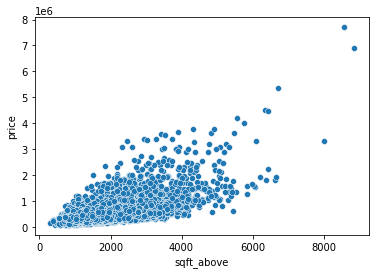

In [26]:
sns.scatterplot(x = data.sqft_above, y = data.price)

# here we could see a linear correlation between sqft_above and price

Appears a linear correlation between sqft_above and price.

In [27]:
# check 3 columns relationship
data[["sqft_living", "sqft_basement","sqft_above"]]

len(data[data.sqft_living == data.sqft_basement + data.sqft_above])

9761

sqft_living = sqft_basement + sqft_above  

### Sqft_lot

In [28]:
# square footage of the land space
print("Sqft Lot:")
print("Mean: ",data["sqft_lot"].mean())
print("Nulls: ",data["sqft_lot"].isnull().sum())
print("Median: ",data["sqft_lot"].median())
print("Zeroes:", (data["sqft_lot"]==0).sum())
print("Min: ",(data["sqft_lot"]).min())
print("Max: ",(data["sqft_lot"]).max())

# some outliers

Sqft Lot:
Mean:  15215.26062903391
Nulls:  0
Median:  7642.0
Zeroes: 0
Min:  520
Max:  1651359


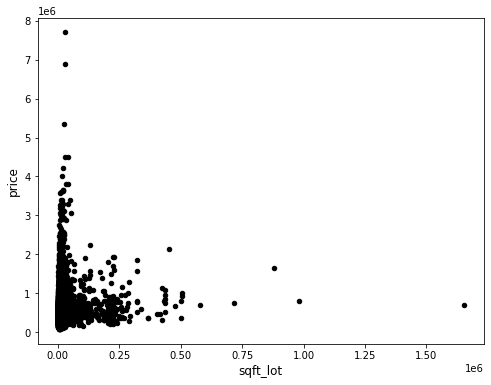

In [29]:
import matplotlib.pyplot as plt
#Scatter Plot 
data.plot(kind='scatter', x='sqft_lot', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('sqft_lot', fontsize=12)
plt.show()

# deosn't seem to have positive correlation

# check with sqft_living, check for downward trend

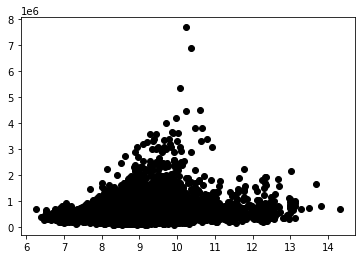

In [30]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve  
import numpy as np

plt.scatter(np.log(data.sqft_lot), y=data.price, color='black')
plt.show()

It doesn't seem to have any linear correlation wrt price.

### floors

In [31]:
# number of floors
print("floors:")
print("Mean: ",data["floors"].mean())
print("Nulls: ",data["floors"].isnull().sum())
print("Median: ",data["floors"].median())
print("Zeroes:", (data["floors"]==0).sum())
print("Min: ",(data["floors"]).min())
print("Max: ",(data["floors"]).max())

pd.crosstab(data.floors, columns="Counts").T

# some outliers, 0.5?


floors:
Mean:  1.4860670013318307
Nulls:  0
Median:  1.5
Zeroes: 0
Min:  1.0
Max:  3.5


floors,1.0,1.5,2.0,2.5,3.0,3.5
col_0,,,,,,
Counts,4862,867,3723,62,245,2


In [32]:
data[["floors","price"]].groupby(["floors"]).median().T
# positive correlation till 2.5 but decreased at 3.0, seems unusual.

floors,1.0,1.5,2.0,2.5,3.0,3.5
price,383075.0,536000.0,550000.0,802100.0,474950.0,1912500.0


In [33]:
data[["floors","price"]].groupby(["floors"]).mean().T

floors,1.0,1.5,2.0,2.5,3.0,3.5
price,439663.570547,576776.657439,655950.123825,1167610.0,577988.122449,1912500.0


<AxesSubplot:xlabel='floors', ylabel='price'>

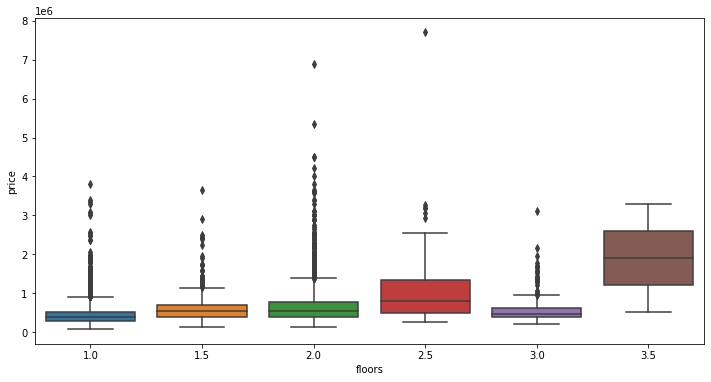

In [34]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(x = data['floors'], y = data['price'])

Appears positive correlation till 2.5 but decreased at 3.0, seems unusual.
Overall, a linear correlation does not seem to appear.

### waterfront

In [35]:
# apartment was overlooking the waterfront or not
print("waterfront:")
print("Nulls: ",data["waterfront"].isnull().sum())
print("Zeroes:", (data["waterfront"]==0).sum())
print("Ones:", (data["waterfront"]==1).sum())
print("Min: ",(data["waterfront"]).min())
print("Max: ",(data["waterfront"]).max())
# mostly 0 so biased, not useful

waterfront:
Nulls:  0
Zeroes: 9679
Ones: 82
Min:  0
Max:  1


<AxesSubplot:xlabel='waterfront', ylabel='price'>

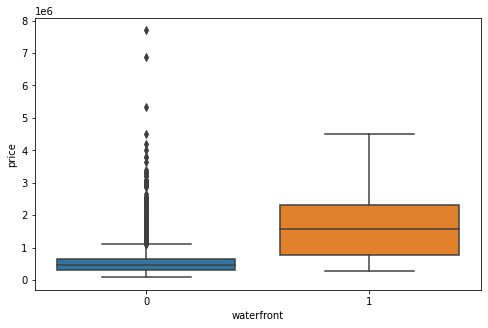

In [36]:
fig,ax = plt.subplots(figsize=(8,5))
sns.boxplot(x = data['waterfront'], y = data['price'])

Waterfront indicator seems to influence prices significantly.

### VIEW

In [37]:
# how good the view of the property was
print("view:")
print("Mean: ",data["view"].mean())
print("Nulls: ",data["view"].isnull().sum())
print("Median: ",data["view"].median())
print("Zeroes:", (data["view"]==0).sum())
print("Min: ",(data["view"]).min())
print("Max: ",(data["view"]).max())

# mostly 0 rating , not helpful

pd.crosstab(data.view, columns="Counts").T


view:
Mean:  0.24802786599733634
Nulls:  0
Median:  0.0
Zeroes: 8748
Min:  0
Max:  4


view,0,1,2,3,4
col_0,,,,,
Counts,8748,160,454,243,156


<AxesSubplot:xlabel='view', ylabel='price'>

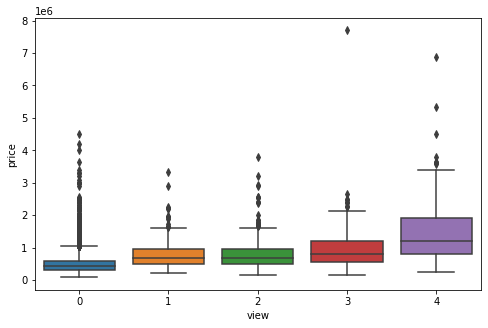

In [38]:
fig,ax = plt.subplots(figsize=(8,5))
sns.boxplot(x = data['view'], y = data['price'])

View seems to have positive correlation wrt price. 

### condition

In [39]:
# condition of the apartment
print("condition:")
print("Mean: ",data["condition"].mean())
print("Nulls: ",data["condition"].isnull().sum())
print("Median: ",data["condition"].median())
print("Zeroes:", (data["condition"]==0).sum())
print("Min: ",(data["condition"]).min())
print("Max: ",(data["condition"]).max())

pd.crosstab(data.condition, columns="Counts").T

# scale 1 - 5

condition:
Mean:  3.415531195574224
Nulls:  0
Median:  3.0
Zeroes: 0
Min:  1
Max:  5


condition,1,2,3,4,5
col_0,,,,,
Counts,10,78,6291,2610,772


In [40]:
data[["condition","price"]].groupby(["condition"]).median().T

condition,1,2,3,4,5
price,396000.0,269975.0,450000.0,436400.0,545000.0


In [41]:
data[["condition","price"]].groupby(["condition"]).mean().T

condition,1,2,3,4,5
price,471500.0,328911.064103,543123.240343,519824.937931,639552.340674


<AxesSubplot:xlabel='condition', ylabel='price'>

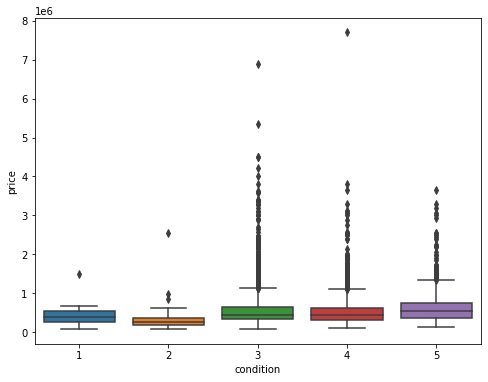

In [42]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = data['condition'], y = data['price'])

# not strong correlation

It doesn't appear to have linear correlaion.Most houses have 3 & 4 rating but pricing doesn't seem any different.

### Grade

In [43]:
# level of construction and design
print("grade:")
print("Mean: ",data["grade"].mean())
print("Nulls: ",data["grade"].isnull().sum())
print("Median: ",data["grade"].median())
print("Zeroes:", (data["grade"]==0).sum())
print("Min: ",(data["grade"]).min())
print("Max: ",(data["grade"]).max())

pd.crosstab(data.grade, columns="Counts").T

# scale 1 - 13, 

grade:
Mean:  7.661510091179182
Nulls:  0
Median:  7.0
Zeroes: 0
Min:  1
Max:  13


grade,1,4,5,6,7,8,9,10,11,12,13
col_0,,,,,,,,,,,
Counts,1,17,107,914,4067,2707,1192,532,172,45,7


<AxesSubplot:xlabel='grade', ylabel='price'>

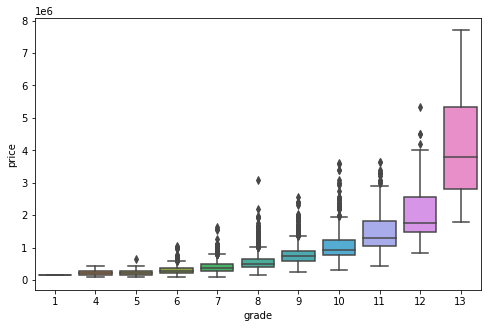

In [44]:
fig,ax = plt.subplots(figsize=(8,5))
sns.boxplot(x = data['grade'], y = data['price'])

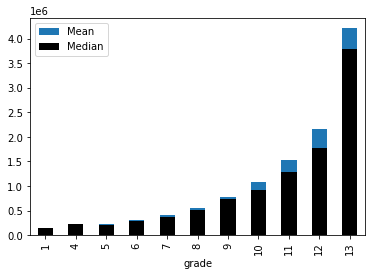

In [45]:
data.groupby('grade')['price'].mean().plot(kind ='bar', label = 'Mean')

data.groupby('grade')['price'].median().plot(kind ='bar', color = 'black', label = 'Median')

plt.legend()

plt.show()
# so we can conclude that a higher grade construction will lead to higher selling price

Grade 7 and grade 8 are leading grades of houses sold.

Appears good correlation wrt price.

####  Year built:
Does age of the building affect prices?

In [46]:
## created two new columns to check the age of the building and renovation flag

# renovated or not is indicated by column 'yes_ren' = 0 or 1.
data_age_ren = data.copy()
data_age_ren['renovated'] = np.where(data_age_ren.yr_renovated > 0, 1, 0)

# age of building
data_age_ren['age'] = (data_age_ren.date.str.slice(0,4).astype(int)) - (data_age_ren.yr_built)

data_age_ren.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,age
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,49
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0,13
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,0,72
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,0,87
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,0,37


In [47]:
print(data_age_ren.renovated.value_counts(),'\n')

print('% of renovated houses in data:\t',round(100*data_age_ren.renovated.value_counts()[1]/len(data_age_ren),2))

0    9340
1     421
Name: renovated, dtype: int64 

% of renovated houses in data:	 4.31


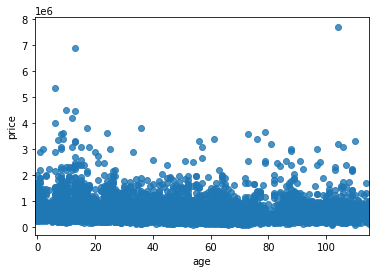

In [48]:
sns.regplot( x = data_age_ren.age, y = data_age_ren.price, data= data_age_ren)
plt.show()

#could not see correlation wrt price

In [49]:
# year renovated indicator vs price of house

print('yr_renovated is yes(1) : price')
print('mean:',data_age_ren[data_age_ren.renovated == 1].price.mean())
print('median:',data_age_ren[data_age_ren.renovated == 1].price.median())
print('\nyr_renovated is no(0) : price')
print('mean:',data_age_ren[data_age_ren.renovated == 0].price.mean())
print('median:',data_age_ren[data_age_ren.renovated == 0].price.median())

# the mean/median sale price of renovated house is observed greater than non-renovated houses

yr_renovated is yes(1) : price
mean: 757336.8598574821
median: 595000.0

yr_renovated is no(0) : price
mean: 533061.7821199143
median: 447000.0


In [51]:
# checking R^2 of age, renovation flag columns wrt price

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

lin_age_ren = LinearRegression()
scores = cross_val_score(lin_age_ren, data_age_ren[['age','renovated']],data_age_ren['price'], cv=10, scoring = "r2")
print('R2 Score:',scores.mean())

R2 Score: 0.015864475659737233


 age, renovation flag do not seem to explain the variation in 'price' much as indicated by very low R^2.

**Zip- Code (implies location) plays an important role?**

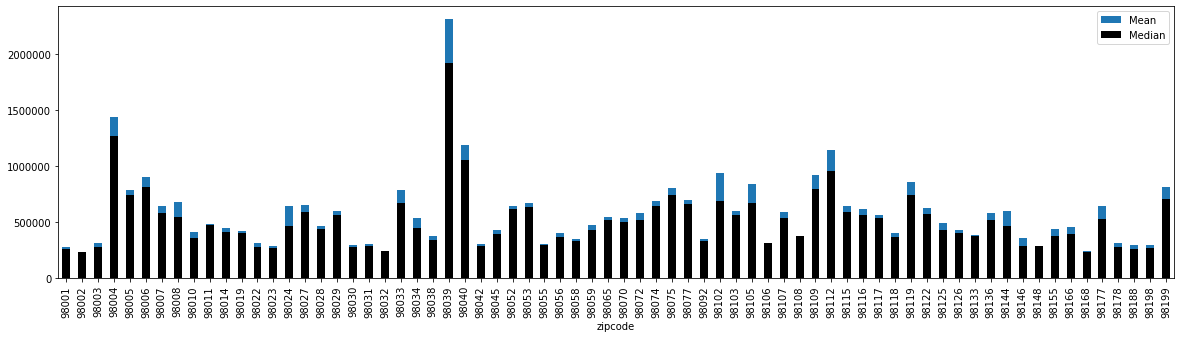

In [52]:
plt.figure(figsize=(20,5))

plt.ticklabel_format(useOffset=False, style='plain')

data.groupby('zipcode')['price'].mean().plot(kind = 'bar', label = 'Mean')

data.groupby('zipcode')['price'].median().plot(kind = 'bar', color = 'black', label = 'Median')

plt.legend()

plt.show()

The average price per zip code appears varying based on some zipcode(which have higher mean price).

**One Hot Encoding for zipcodes**

In [53]:
# zipcode one-hot encoding and checking the correlation wrt price.

one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

lin_zip = LinearRegression()

scores = cross_val_score(lin_zip, one_hot_zip,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.39 which is high for a single factor

R2 Score: 0.3950022518019053


**sqft_living15**

In [54]:
data_traversed_area = data[['price','sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']].copy()

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

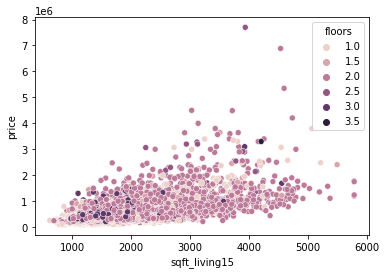

In [55]:
sns.scatterplot(x = data_traversed_area.sqft_living15, y = data_traversed_area.price,hue = data.floors)

Appears a positive correlation wrt price. 

**What if the house size (living space) is more than the average (living space for nearest 15), will it influence the price**

In [57]:
data_traversed_area['diff_liv_and_liv15'] = data_traversed_area.sqft_living - data_traversed_area.sqft_living15

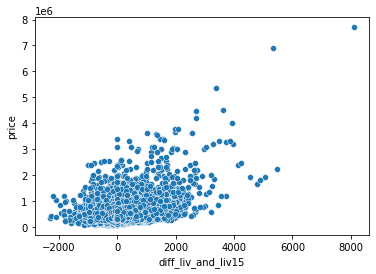

In [58]:
sns.scatterplot(x = data_traversed_area.diff_liv_and_liv15, y =  data_traversed_area.price)

plt.show()

There is no direct trend, ie., if a house is having more than the average living space, that is not influencing the price

**sqft_lot15**

In [59]:
data_traversed_area.sqft_lot15.describe()

count      9761.000000
mean      12824.785165
std       26518.337402
min         660.000000
25%        5160.000000
50%        7660.000000
75%       10113.000000
max      560617.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

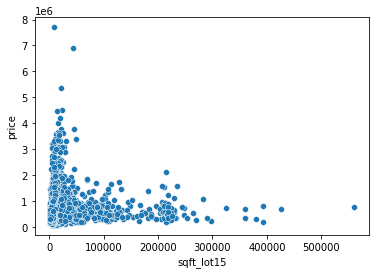

In [60]:
sns.scatterplot(x = data_traversed_area.sqft_lot15, y = data_traversed_area.price)

sqft_lot15 does not seem to have any linear correlation wrt price.

### Correlation graphs, scatter plots between all variables

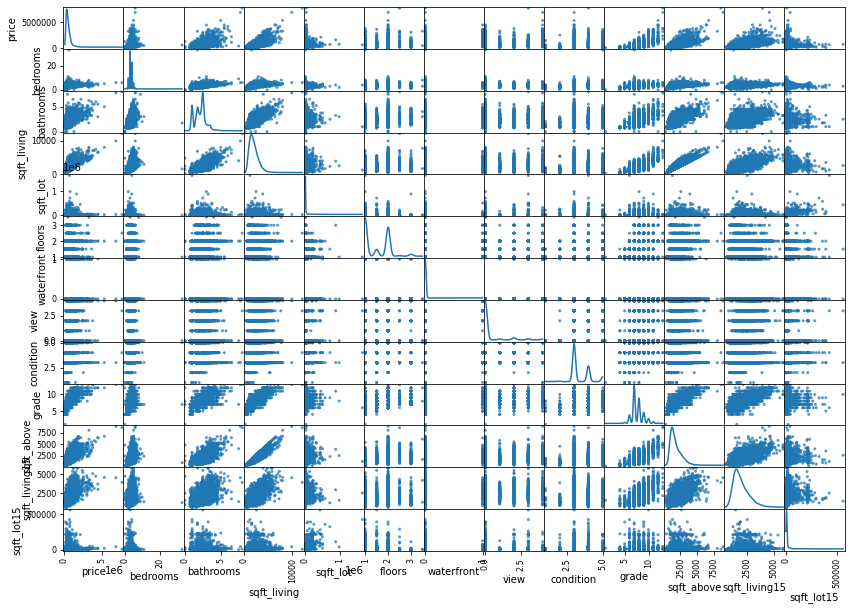

In [61]:
# scallter plots between variables

from pandas.plotting import scatter_matrix

scatter_matrix(data.drop(["id", "date", "sqft_basement", "yr_built","yr_renovated","zipcode",
                           "lat","long",], axis=1), alpha = 0.75, figsize=(14,10), diagonal = 'kde')
plt.show()

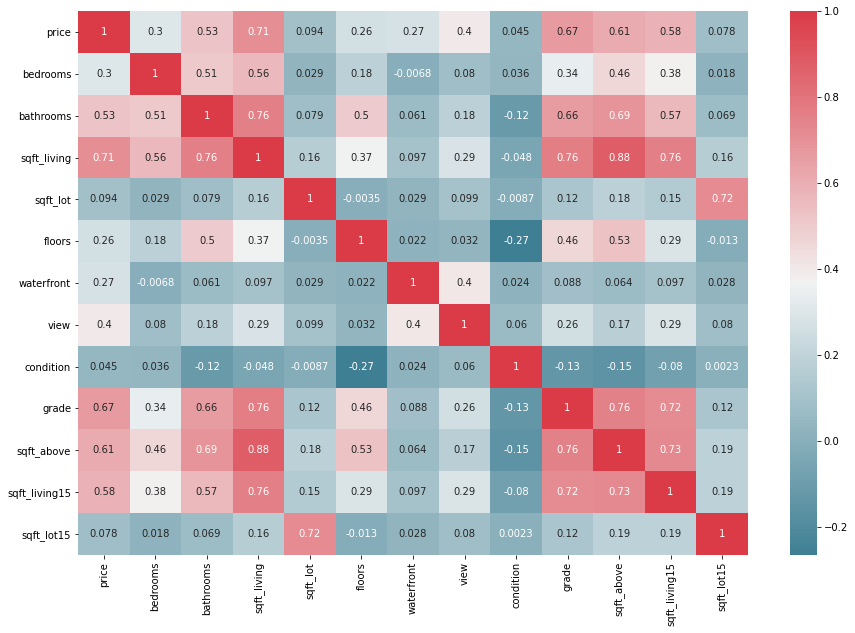

In [62]:
# correlation heatmap between variables

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data.drop(["id", "date", "sqft_basement", "yr_built","yr_renovated","zipcode",
                           "lat","long"], axis=1))

sqft_living, grade , sqft_above, sqft_living15 have high correlation wrt price.  
Also, bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, grade, floors are highly correlated among predictor variables.  
Also, sqft_lot & sqft_lot15 are highly correlated with each other but have less correlation wrt price.  

### Observations on EDA:

* no. of bedrooms - appears to have an impact, positively on the price.
* no. of bathrooms - appears to have an impact, positively on the price.
* high correlation observed b/w bedrooms, bathrooms, sqft_living.
* sqft_living - appears to have an impact, positively on the price.
* sqft_above - appears to have an impact, positively on the price.
* sqft_basement - appears to have an very light impact, positively on the price. 
* sqft_basement, sqft_above are highly correlated to sqft_living.
* grade - appears to have an impact, positively on the price. 
* grade has high correlation wrt bedrooms, bathrroms & sqft_living, sqft_above.
* zipcode - Appears to have impact on price. 
* yr_built, yr_renovated - renovated houses have mean price greater than others , however age does not appear to have   impact on price.
* sqft_living_15 - appears to have slight impact, positively on price. However, it is highly correlated to sqft_living.
* waterfront - Around 90% values are zero, however presence of waterfront seems to be related to higher price.
* view - Around 90% values are  zero, however there seems a slight positive correlation wrt price.  
* condition - does not appear to have correlation wrt the price. 
* floor - Does not appear to have much linear correlation wrt the price.
* sqft_lot_15 - does not appear to have correlation wrt the price.

### 3) Initial model fitting step

**Model Fitting - for attributes that were promising based on EDA**
1. Because sqft_living = sqft_above + sqft_basement, only sqft_living/sqft_above will be considered and other two may be dropped.  
Similarly, highly correlated variables like sqft_living15 bedrooms, bathrooms can be kept aside if the sqft area is taken as predictor.
2. Zipcode is to be one-hot encoded and then added to the predictors.
3. Standardizing/Normalizing may be done to the continuous, ordinal variables.
4. Feature Engineering may need to be tried.

### Checking for VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_vif = data.copy()
data_vif = data_vif._get_numeric_data()
X= data_vif.drop(["id","price","lat","long","zipcode","yr_built","yr_renovated",
               "sqft_basement","floors" ], axis =1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.T

,0,1,2,3,4,5,6,7,8,9,10
VIF Factor,19.05793,22.062121,40.940179,2.386226,1.207325,1.508001,21.106332,57.736152,29.689386,26.038246,2.617783
features,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15


In [64]:
# bedrooms,sqft_living,condition,grade,sqft_above indicate VIF above >> 5.
# So lets check removing few columns from this.

from statsmodels.stats.outliers_influence import variance_inflation_factor
data_vif = data.copy()
data_vif = data_vif._get_numeric_data()
X= data_vif.drop(["id","price","lat","long","zipcode","yr_built","yr_renovated","sqft_above",
               "sqft_basement","floors","bathrooms","sqft_living15","grade","bedrooms","condition" ], axis =1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.T)


                      0         1           2         3           4
VIF Factor     1.430854  2.369448    1.204346  1.396939    2.562661
features    sqft_living  sqft_lot  waterfront      view  sqft_lot15


**The VIF values indicate multicollinearity.**  
So, combinations of varibales can be tried in the model based on the correlation of the variables wrt price & other predictor varibales.        
1. 'sqft_living', 'view','waterfront', 'zipcode'. 

## 1st Model:

In [65]:
# importing libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [66]:
columns_model1 = ['sqft_living', 'view', 'waterfront'] 
data_train = data[columns_model1].copy()

# one hot encoding done for zipcode

one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

#concatenating the one-hot encoded columns to the dataset

data_train = pd.concat([data_train,one_hot_zip],axis = 1)

# linear regression model fitting using sklearn
lr = LinearRegression()
scores = cross_val_score(lr, data_train,data['price'], cv=10, scoring = "r2")
print('R2 Score:',scores.mean())

#Fitting Linear Regression model using the Statsmodels.api package to check model summary
import statsmodels.api as stm
data_trainOLS = stm.add_constant(data_train)
model_sm = stm.OLS((data['price']),data_trainOLS).fit()
print(model_sm.summary())

R2 Score: 0.7771139357655372
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     482.3
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:17:45   Log-Likelihood:            -1.3181e+05
No. Observations:                9761   AIC:                         2.638e+05
Df Residuals:                    9688   BIC:                         2.643e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.643e+0

***Model is significant as indicated by F-statistic, pvalue.***
***All the predictor coefficients are significant as indicated by t stat, pvalue.***   
***Now, lets check for the residuals for linear regression assumptions.***

c:\users\rajes\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


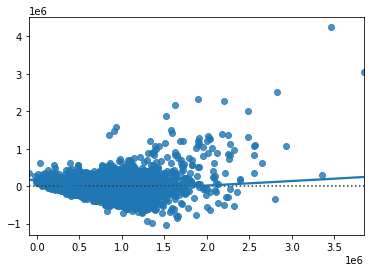

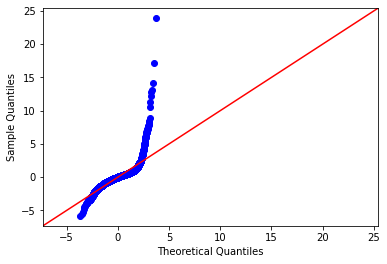

In [67]:
# residual analysis

# residual vs fitted values plot
sns.residplot(x=model_sm.fittedvalues, y=model_sm.resid, lowess = True)

# Q-Q plot
residuals = model_sm.resid
stm.qqplot(residuals, fit=True, line="45")

plt.show()         

***The Residuals indicate heteroscedasticity ie variance of residuals shows increasing kind of pattern.***  
***Also, the QQ plot indicates the non-normality of residuals.***  
*So the target variable 'price' may be tried with log-transformation to check if the same pattern persists.*  
*Also, the correlation of variables wrt log(price) to be checked.* 

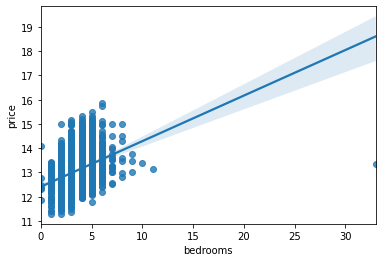

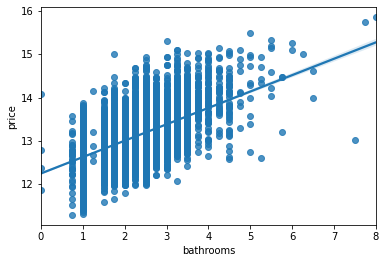

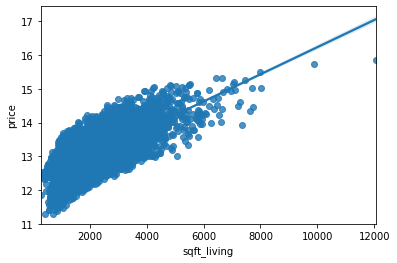

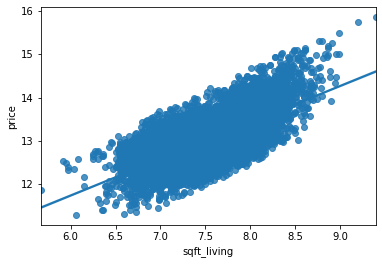

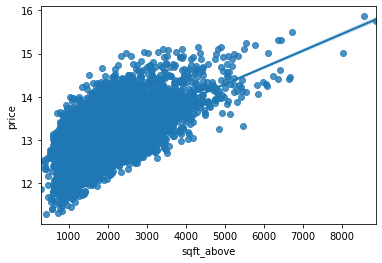

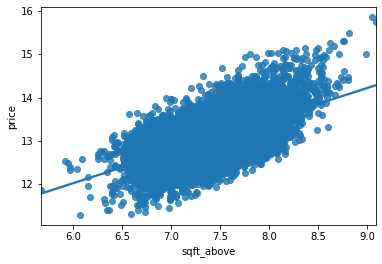

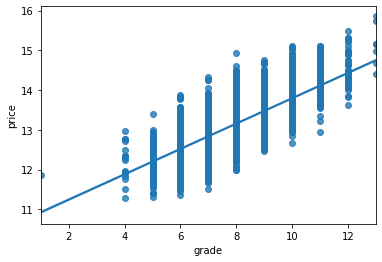

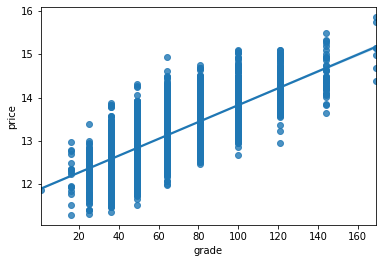

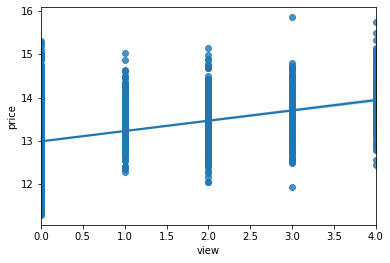

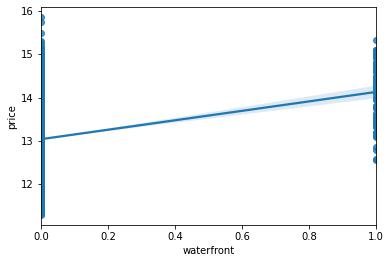

In [68]:
# checking plots for visualizing correlation wrt log(price)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
ax = sns.regplot(x=data.bedrooms, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.bathrooms, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.sqft_living, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=np.log(data.sqft_living), y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.sqft_above, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=np.log(data.sqft_above), y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.grade, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=np.square(data.grade), y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.view, y=np.log(data.price), data=data)
plt.show()
ax = sns.regplot(x=data.waterfront, y=np.log(data.price), data=data)
plt.show()



***As observed in the plots, all the variables seems to have linear correlation wrt log(price).***  
*So, lets fit the model with same columns & check for residuals with log(price)*

In [69]:
columns_model1 = ['sqft_living', 'view', 'waterfront']
data_train = data[columns_model1].copy()

# one hot encoding for zipcode

one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

#concatenating the one-hot encoded columns to the dataset

data_train = pd.concat([data_train,one_hot_zip],axis = 1)

# linear regression model fitting

lr = LinearRegression()
scores = cross_val_score(lr, data_train,np.log(data['price']), cv=10, scoring = "r2")
print('R2 Score:',scores.mean())

#Fitting Linear Regression model using the Statsmodels.api package

import statsmodels.api as stm
data_trainOLS = stm.add_constant(data_train)
model_sm = stm.OLS(np.log(data['price']),data_trainOLS).fit()
print(model_sm.summary())

R2 Score: 0.8443365869108408
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     753.2
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:18:12   Log-Likelihood:                 1524.3
No. Observations:                9761   AIC:                            -2903.
Df Residuals:                    9688   BIC:                            -2378.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.883

c:\users\rajes\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


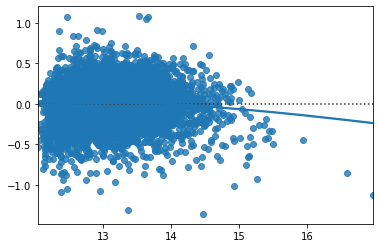

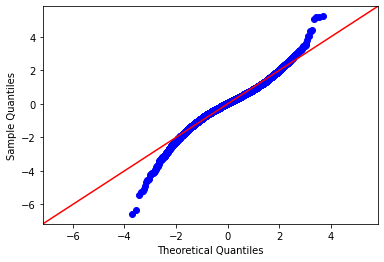

In [70]:
# residual analysis

# residual vs fitted values plot
sns.residplot(x=model_sm.fittedvalues, y=model_sm.resid, lowess = True)

# Q-Q plot
residuals = model_sm.resid
stm.qqplot(residuals, fit=True, line="45")

plt.show()         

***Residuals now seem some what closer to the normal & constant variance assumptions.***  
***Model & predictors varibles are significant***  
***Adj R^2 = 0.847***  
***Now, Lets try to include other variables and check if R^2 can be improved.***

### Model 2

*In this Model, lets try adding predictors 'bathrooms', 'grade'.*

In [71]:
# predictors for model2

columns_model2 = ['sqft_living', 'view', 'waterfront', 'grade', 'bathrooms']

data_train = data[columns_model2].copy()

# one hot encoding done for zipcode

one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

#concatenating the one-hot encoded columns to the dataset

data_train = pd.concat([data_train,one_hot_zip],axis = 1)

# linear regression model fitting
lr = LinearRegression()
scores = cross_val_score(lr, data_train,np.log(data['price']), cv=10, scoring = "r2")
print('R2 Score:',scores.mean())

import statsmodels.api as stm
data_trainOLS = stm.add_constant(data_train)
model_sm = stm.OLS(np.log(data['price']),data_trainOLS).fit()
print(model_sm.summary())

R2 Score: 0.864019503841962
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     861.3
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:18:28   Log-Likelihood:                 2201.8
No. Observations:                9761   AIC:                            -4254.
Df Residuals:                    9686   BIC:                            -3715.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2930

c:\users\rajes\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


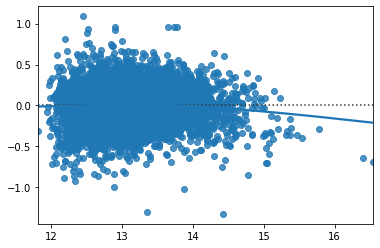

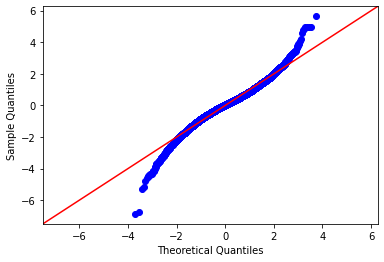

In [72]:
# residual analysis

# residual vs fitted values plot
sns.residplot(x=model_sm.fittedvalues, y=model_sm.resid, lowess = True)

# Q-Q plot
residuals = model_sm.resid
stm.qqplot(residuals, fit=True, line="45")

plt.show()   

**Model & All the variables are significant.**  
**Adjusted R^2 0.867.**  
***Not a significant increase is R^2 from model-1.***  
***Residuals seem similar to model1 ie closer to the normal & constant variance assumptions.***  
***However, multicollinearity seems to exist as indicated by high condition number.***

### Model 3:

Because multicolliinearity appears between bathrooms, sqft_living & grade, we will try using the transformed variables of 
['grade', 'sqft_living']  ie [np.squre('grade'), np.log(sqft_living)] in this model, dropping 'bathrooms' as the former two have higher correlation wrt price.

In [73]:
data3 = data.copy()
data3['view2'] = np.square(data3['view'])
data3['grade2'] = np.square(data3['grade'])
data3['sqft_living2'] = np.log(data3['sqft_living'])

columns_model3 = ['sqft_living2','waterfront', 'view', 'grade2']

data_train = data3[columns_model3]

# data normalization being done as predictos are of different scales.

scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_train= pd.DataFrame(data_train, columns = columns_model3)

# one hot encoding for zipcode

one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

#concatenating the one-hot encoded columns to the dataset

data_train = pd.concat([data_train,one_hot_zip],axis = 1)

# linear regression model fitting

lr = LinearRegression()
scores = cross_val_score(lr, data_train,np.log(data['price']), cv=20, scoring = "r2")
print('R2 Score :',scores.mean())

#Fitting Linear Regression model using the Statsmodels.api package

import statsmodels.api as stm
data_trainOLS = stm.add_constant(data_train)
model_sm = stm.OLS(np.log(data['price']),data_trainOLS).fit()
print(model_sm.summary())

R2 Score : 0.8685833681063679
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     907.3
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:18:49   Log-Likelihood:                 2364.5
No. Observations:                9761   AIC:                            -4581.
Df Residuals:                    9687   BIC:                            -4049.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11

In [74]:
# checking for VIF among the predictor varibales

from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = data3.copy()
data_vif = data_vif._get_numeric_data()
X= data_vif[columns_model3]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.T

,0,1,2,3
VIF Factor,14.149253,1.203956,1.396817,14.718887
features,sqft_living2,waterfront,view,grade2


Now, VIF values are less for sqft_living2, grade2 than for features sqft_living, grade.

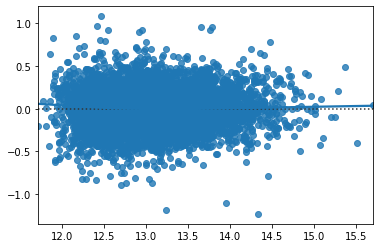

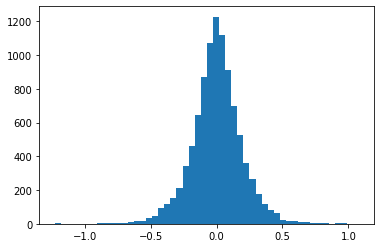

c:\users\rajes\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


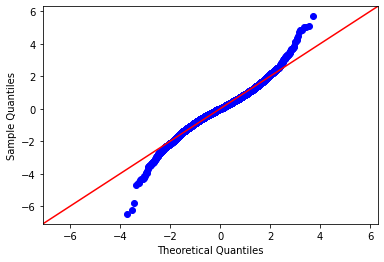

In [75]:
# residual analysis

# residual vs fitted values plot
sns.residplot(x=model_sm.fittedvalues, y=model_sm.resid, lowess = True)
plt.show()

# histogram of residuals

plt.hist(model_sm.resid, bins=50)
plt.show()

# Q-Q plot
residuals = model_sm.resid
stm.qqplot(residuals, fit=True, line="45")
plt.show() 

***The model & varibales are significant*** 
***Adj.R^2 is 0.87***  
***Residuals are not heteroscedastic & are close to normal.*** 

***As the linear regression assumptions are not deviated much &  model explans variability of y with decent R^2***  
***this linear regression model is considered for predictions on test data.*** 

***Important features determining the price (by order): sqft_living, grade, zipcode(like 98039, 98004, 98112, 98109,***   ***98102etc..), waterfront, view.***   


### Predictions on test data using Model 3

In [76]:
# reading test data.

test_data = pd.read_csv('wk3_kc_house_test_data.csv')

# test data preparation inline with train data.

datat = test_data.copy()
datat['view2'] = np.square(datat['view'])
datat['grade2'] = np.square(datat['grade'])
datat['sqft_living2'] = np.log(datat['sqft_living'])
data_test = datat[columns_model3]

# data normalization
scaler = MinMaxScaler()
scaler.fit(data_test)
data_test = scaler.transform(data_test)
data_test= pd.DataFrame(data_test, columns = columns_model3)

# one hot encoding for zipcode
one_hot_zip = pd.get_dummies(test_data.zipcode, drop_first=True)
data_test = pd.concat([data_test,one_hot_zip],axis = 1)

# model fitting on train data & printing train-data metrics
X_train = data_train
y_train = np.log(data['price'])
lrf = LinearRegression()
lrf.fit(data_train,np.log(data['price']))
scores = cross_val_score(lrf, data_train,np.log(data['price']), cv=10, scoring = "r2")
rmse_scores = cross_val_score(lrf, data_train,np.log(data['price']),cv=10, scoring = "neg_root_mean_squared_error")
y_pred_train = lrf.predict(X_train)
print('train R^2:', round(scores.mean(),4))
print('train RMSE on log(price):', round(-rmse_scores.mean(),4))                            
print('train RMSE on price:', round(np.sqrt(np.mean(np.square(np.exp(y_train) - np.exp(y_pred_train)))),2))
print('train MAPE on price:', round(100* np.mean(np.abs((np.exp(y_pred_train) - np.exp(y_train))/np.exp(y_train))),2),"%")

# predicting the on test data
                              
X_test = data_test
y_test = np.log(test_data['price'])

# R^2 square
                              
test_R2 = lrf.score(X_test, y_test)
print('===================================')
print('test R^2:', round(test_R2,4)) 
                              
# RMSE
y_pred = lrf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('test RMSE on log(price):', round(rmse,4))
print('test RMSE on price:', round(np.sqrt(np.mean(np.square(np.exp(y_test) - np.exp(y_pred)))),2))
print('test MAPE on price:', round(100* np.mean(np.abs((np.exp(y_pred) - np.exp(y_test))/np.exp(y_test))),2), '%')

train R^2: 0.8687
train RMSE on log(price): 0.1917
train RMSE on price: 139240.77
train MAPE on price: 14.34 %
test R^2: 0.8334
test RMSE on log(price): 0.2159
test RMSE on price: 156865.18
test MAPE on price: 16.84 %


### Linear Regression Results:

Prediction results on Test data:  
R^2: 0.8334  
RMSE on price: 156865.18  
MAPE on price: 16.84 %  
  
Important features determining the price (by order):   
sqft_living, grade, zipcode(like 98039, 98004, 98112, 98109,   98102etc..), waterfront, view.

## Decision Tree Models

Now, lets try Decison Trre models.  
To start with, lets try the features based on EDA & linear regression model-3.  
The predictos considered are 'sqft_living', 'waterfront', 'view', 'grade', zipcode(one-hot encoded).

In [77]:
# importing library

from sklearn.tree import DecisionTreeRegressor

In [78]:
# DT model 1

from sklearn.tree import DecisionTreeRegressor

# data prep

train_data_dt = data.copy()

# predictors for dt_model1

columns_dt_model1 = ['sqft_living', 'waterfront', 'view', 'grade']

X_train = train_data_dt[columns_dt_model1]

# adding one hot encoding for train data

one_hot_zip = pd.get_dummies(train_data_dt.zipcode, drop_first=True)

# predictor, target separation
X_train = pd.concat([X_train,one_hot_zip],axis = 1)
y_train = train_data_dt['price']

# Model fitting & Cross Validation on decision tree regressor
# Using Cross Validation to train and validate on the train data with the selected features

d_tree = DecisionTreeRegressor(random_state=100)
rmse_scores = cross_val_score(d_tree, X_train,y_train,cv=10, scoring = "neg_root_mean_squared_error")
r2_scores = cross_val_score(d_tree, X_train,y_train, cv=10, scoring = "r2")

# cross validated  scores on train data
print('\nCross Validation scores')
print('RMSE: ',-rmse_scores.mean())
print('R2: ',r2_scores.mean())


Cross Validation scores
RMSE:  208040.1846742245
R2:  0.6943589180481723


R^2 is 0.6943 which is less compared to LR models.  
It appears that 'lat, long' may be appropriate for location instead of one-hot encoded zipcode incase of DT model.


In [79]:
# DT Model 2

# predictors for model 2:
columns_dt_model2 = ['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long']

# predictor, target separation
X_train = train_data_dt[columns_dt_model2]
y_train = train_data_dt['price']

# Model fitting & Cross Validation on decision tree regressor
# Using Cross Validation to train and validate on the train data with the selected features
d_tree = DecisionTreeRegressor(random_state=100)
rmse_scores = cross_val_score(d_tree, X_train,y_train,cv=10, scoring = "neg_root_mean_squared_error")
r2_scores = cross_val_score(d_tree, X_train,y_train, cv=10, scoring = "r2")

# cross validated  scores on train data
print('\nCross Validation scores')
print('RMSE: ',-rmse_scores.mean())
print('R2: ',r2_scores.mean())


Cross Validation scores
RMSE:  186044.20968505894
R2:  0.754546077673862


R^2 =0.7545 is improved.  
Now, will try to include some multicollinear features which may impove R^2 in DT model,   
as DT is not as sensiive as LR models to multicollinearity.

In [80]:
# DT Model 3:

# predictors for model3:
columns_dt_model3 = ['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long',
                     'bathrooms', 'sqft_above']

# predictor, target separation
X_train_1 = train_data_dt[columns_dt_model3]
y_train_1 = train_data_dt['price']

# Model fitting & Cross Validation on decision tree regressor
# Using Cross Validation to train and validate on the train data with the selected features
d_tree = DecisionTreeRegressor(random_state=100)
rmse_scores = cross_val_score(d_tree, X_train_1,y_train_1,cv=10, scoring = "neg_root_mean_squared_error")
r2_scores = cross_val_score(d_tree, X_train_1,y_train_1, cv=10, scoring = "r2")

# cross validated  scores on train data
print('\nCross Validation scores')
print('RMSE: ',-rmse_scores.mean())
print('R2: ',r2_scores.mean())


Cross Validation scores
RMSE:  184479.85526837333
R2:  0.7608899383308969


R^2 =0.7608 improved slightly.  
So, now lets try adding 'age', 'renovated' predictors to check R^2. 

In [81]:
# DT model 4:

# new column renovation flag

train_data_dt['renovated'] = np.where(train_data_dt.yr_renovated > 0, 1, 0)

# new column age of building

train_data_dt['age'] = (train_data_dt.date.str.slice(0,4).astype(int)) - (train_data_dt.yr_built)

# predictors for model4:

columns_dt_model4 = ['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long', 'age', 'renovated']

# predictor, target separation
X_train_1 = train_data_dt[columns_dt_model4]
y_train_1 = train_data_dt['price']

# Model fitting & Cross Validation on decision tree regressor
# Using Cross Validation to train and validate on the train data with the selected features
d_tree = DecisionTreeRegressor(random_state=100)
rmse_scores = cross_val_score(d_tree, X_train_1,y_train_1,cv=10, scoring = "neg_root_mean_squared_error")
r2_scores = cross_val_score(d_tree, X_train_1,y_train_1, cv=10, scoring = "r2")

# cross validated  scores on train data
print('\nCross Validation scores')
print('RMSE: ',-rmse_scores.mean())
print('R2: ',r2_scores.mean())


Cross Validation scores
RMSE:  197947.4833411387
R2:  0.7214645226057571


R^2 did not improve(rather reduced) by addition of these features.  
So, the best features found for DT model are:   
['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long', 'bathrooms', 'sqft_above']  

Now, lets check the best Tree parameters using GridsearchCV.

**DTree Model with GridSearchCV for best hyperparameters**

In [82]:
# importing GridsearchCv package from library

from sklearn.model_selection import GridSearchCV
from sklearn import tree

# train data

columns_dt_model_CV = ['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long',
                     'bathrooms', 'sqft_above']
X_train = train_data_dt[columns_dt_model_CV]
y_train = train_data_dt['price']

#parameters to be tuned 

parameters={'min_samples_split' : range(20,100,10),'max_depth': range(4,20,4)}

#GridSearch cross valition with CV=10 , the parameters to be tuned as above

clf_tree=tree.DecisionTreeRegressor()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train,y_train)

#best estimator of gridsearchCV

print('\nclf.best_estimator_:')
print(clf.best_estimator_)

# cross validated scores on best estimator obtained by gridsearchCV
rmse_scores = cross_val_score(clf.best_estimator_, X_train,y_train,cv=5, scoring = "neg_root_mean_squared_error")
r2_scores = cross_val_score(clf.best_estimator_, X_train,y_train, cv=5, scoring = "r2")

# cross validated  scores on train data
print('\nCross Validation scores')

print('RMSE: ',-rmse_scores.mean())
print('R2: ',r2_scores.mean())


clf.best_estimator_:
DecisionTreeRegressor(max_depth=12, min_samples_split=30)

Cross Validation scores
RMSE:  179352.456361429
R2:  0.773949656777198


Using the gridsearchCV the R^2 found is 0.7704 which is better than the default paramter DT model.  
However, it is still less than the Linear Regression Model performance.  
Lets try to predict on test data using the gridsearchCV best estimator.

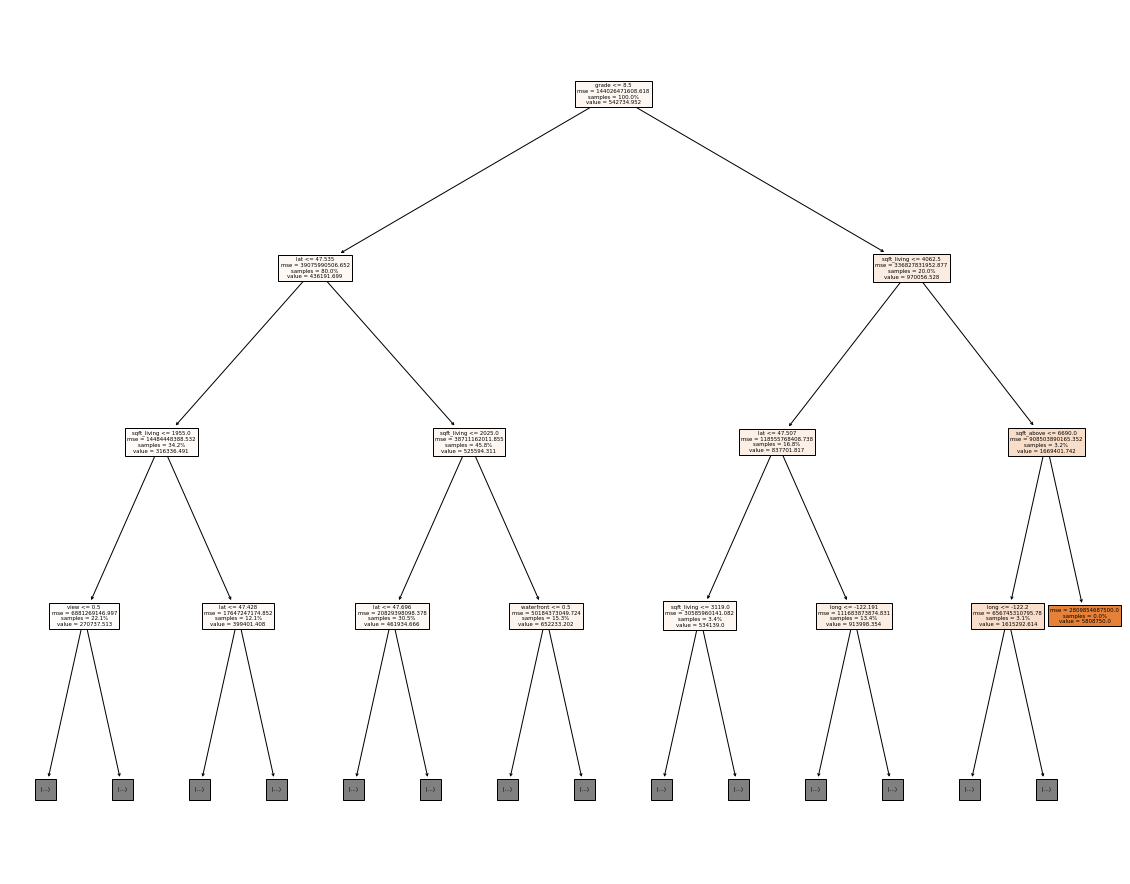

In [83]:
# plotting the decison tree to have an overview of the decision splits to a depth of 3.

# importing libraries
from sklearn import tree
import matplotlib.pyplot as plt

# plotting the decison tree
clf.best_estimator_.fit(X_train, y_train)
plt.figure(figsize=(20,16))
tree.plot_tree(clf.best_estimator_,
               max_depth=3,
               proportion = True,
               filled = True, 
               feature_names= columns_dt_model_CV)

plt.show()

**Predicting with Test Data**

In [84]:
# test data prep pipeline

# reading the test data
test_data = pd.read_csv('wk3_kc_house_test_data.csv')
test_data_dt = test_data.copy()

# predictors for test data
columns_dt_model_CV = ['sqft_living', 'view', 'waterfront', 'grade', 'lat', 'long',
                     'bathrooms', 'sqft_above']

# predictors, target separation
X_test = test_data_dt[columns_dt_model_CV]
y_test = test_data_dt['price']

In [85]:
# final model based on gridsearchCV 
# DecisionTreeRegressor(max_depth=12, min_samples_split=20)

# predictions on test data

y_pred = clf.best_estimator_.predict(X_test)

# scores on test data

print('test R2:',r2_score(y_test,y_pred))
print('test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('test MAPE:', round(100* np.mean(np.abs(y_pred - y_test)/y_test),2), '%')

test R2: 0.7741729654366445
test RMSE: 170288.36352608615
test MAPE: 17.38 %


The test results of the DT model are not better than the linear regression model results.  
So, lets try the ensemble of DTs ie Random Forest Model, which may capture the multicollinearity well &   
can provide the important features so as we dont lose the interpretability to a great extent.  

## Random forest Model

As we see multicollinearity between variables, we will use Randomforest Model as it can address the multicollinearity better than a single DT model.

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


# new column renovation flag

train_data_dt['renovated'] = np.where(train_data_dt.yr_renovated > 0, 1, 0)

# new column age of building

train_data_dt['age'] = (train_data_dt.date.str.slice(0,4).astype(int)) - (train_data_dt.yr_built)

# almost all columns of the data are tried here as RF can handle multicollinearity.

columns_dt_model_CV = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
                       'view', 'condition', 'grade', 'sqft_above', 'lat', 'long', 'sqft_living15', 
                       'sqft_lot15', 'renovated', 'age']

X_train = train_data_dt[columns_dt_model_CV]
y_train = train_data_dt['price']

# model fitting

RFgrid = RandomForestRegressor(oob_score=True, random_state=100) 
param_grid = {'n_estimators':[100,200,300],
              'min_samples_split' : range(20,100,20),
              'max_features':[5,6,8,10],
              'max_depth':[10,15,20]
             }
# gridsearch parameters

rsearch = GridSearchCV(estimator=RFgrid, 
                             param_grid=param_grid,
                             scoring = 'r2',
                             cv=2)

# model fitted on train data to find out best estimator using gridsearchCV

rsearch.fit(X_train, y_train)
print(rsearch.best_estimator_) 

# train prediction with best estimator of gridsearchCV 

pred_train_rf=rsearch.best_estimator_.predict(X_train)

# scores on train data using best estimator predictions
print('train data- error metrics:RF')
print('R^2:', round(r2_score(y_train, pred_train_rf),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_train, pred_train_rf)),2))
print('MAPE:', 100*mean_absolute_percentage_error(y_train,pred_train_rf),"%")


RandomForestRegressor(max_depth=20, max_features=10, min_samples_split=20,
                      oob_score=True, random_state=100)
train data- error metrics:RF
R^2: 0.9337
RMSE: 97746.24
MAPE: 9.685290399213944 %


### Predictions on test data

In [109]:
# test data prep. pipeline

# new column renovation flag

test_data_dt['renovated'] = np.where(test_data_dt.yr_renovated > 0, 1, 0)

# new column age of building

test_data_dt['age'] = (test_data_dt.date.str.slice(0,4).astype(int)) - (test_data_dt.yr_built)

# target, predictors separation.

X_test = test_data_dt[columns_dt_model_CV]
y_test = test_data_dt['price']


# predicting on test data with the best estimator using gridsearchCV

pred_test_rf=rsearch.best_estimator_.predict(X_test)

# scores on test data

print('\ntest data- error metrics:RF')
print('R^2:', round(r2_score(y_test, pred_test_rf),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, pred_test_rf)),2))
print('MAPE:', 100*mean_absolute_percentage_error(y_test,pred_test_rf),'%')


test data- error metrics:RF
R^2: 0.8716
RMSE: 128387.77
MAPE: 14.006754143201853 %


In [110]:
# important features using RF model

rsearch.best_estimator_.feature_importances_

array([0.00165688, 0.0149752 , 0.2638385 , 0.00935118, 0.00121027,
       0.03215731, 0.01717018, 0.00231289, 0.31110153, 0.04539353,
       0.14490289, 0.06219766, 0.0544389 , 0.00890265, 0.00088458,
       0.02950583])

### Decision Tree & Random Forest model Results:  

Using RF model achived R^2 of 0.8716, MAPE of 14.01%, RMSE of 128387.77 on test data.  
The top 3 important features found using RF are:  
sqft_living, grade , latitude (location)  which are in sync with linear regression results.  

Thus the house prices can be predicted with accuracy rates as above.
Both Linear Regression & Random forest are giving similar test results and important features useful for predicting the house prices. So either of the two can be used.

 NOTE: Further improvement of performance may be achived on these models using some more engineered features/interaction features etc...        